In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime 
import seaborn as sns

In [7]:
with open('ultimate_data_challenge.json') as json_data:
    d = json.load(json_data)

# Wrangling and Cleaning Data

In [8]:
data = pd.DataFrame(d)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Right off the bat there are almost 10,000 missing values in the avg_rating_of_driver column and 200 in avg_rating_by_driver, which could mean that they don't care much about the app and forget about it after the ride is done. There are no missing values in the last_trip_date column though, so everyone took at least 1 ride.

In [10]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['signup_date'] = pd.to_datetime(data['signup_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


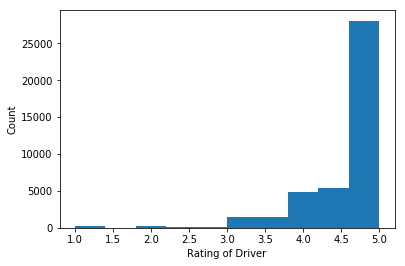

In [11]:
_ = plt.hist(data['avg_rating_of_driver'].dropna()) #It seems like the large majority of reviews are close to 5, so I will replace with median
_ = plt.xlabel('Rating of Driver')
_ = plt.ylabel('Count')

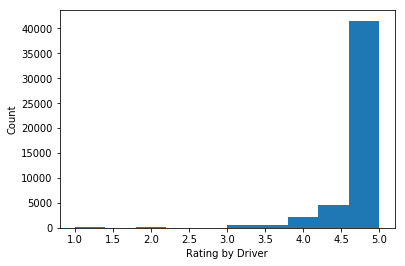

In [12]:
_ = plt.hist(data['avg_rating_by_driver'].dropna()) #It seems like the large majority of reviews are close to 5, so I will replace with median
_ = plt.xlabel('Rating by Driver')
_ = plt.ylabel('Count')

In [13]:
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].fillna(np.median(data['avg_rating_of_driver'].dropna()))
data['avg_rating_by_driver'] = data['avg_rating_by_driver'].fillna(np.median(data['avg_rating_by_driver'].dropna()))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


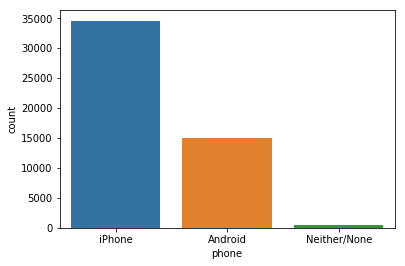

In [14]:
data['phone'] = data['phone'].fillna('Neither/None')
_ = sns.countplot(x = 'phone', data = data)

In [15]:
data.info() #No more missing data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
today = data['last_trip_date'].max() #This is the last day on file for the latest trip. 
today

Timestamp('2014-07-01 00:00:00')

The last day available for the last trip is July 1st, so the range that we will be classifying as active is between June 2nd and July 1st.

In [17]:
date_list = [today - datetime.timedelta(days=x) for x in range(0, 30)] #List of active days
type(date_list)

list

In [18]:
active = today - datetime.timedelta(days=30)

In [19]:
data['active'] = (data['last_trip_date'] > active).astype(int) #If the last ride is greater than the cutoff, it gets a 1
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [20]:
np.mean(data['active'])*100

36.620000000000005

About 36.6 percent of Ultimate users are considered active.

# 2.) Making the Model

All of the signups are from January, and if they are still active in June, then that means they are still active during their 6th month, so I will use all of the data in my model and use a logistic regression to predict the "active" column.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
data_dummies = pd.get_dummies(data, columns = ['city','phone'], dtype = int)
data_dummies.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Neither/None,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,1,0,1,0,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0,1,0,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,1,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,0,1,1,0,0


In [23]:
target = data_dummies['active']
features = data_dummies.drop(['active','last_trip_date','signup_date'], axis = 1)

In [24]:
model = LogisticRegression()
grid = {'C':[0.01,0.1,1,10,100]}
clf = GridSearchCV(model, grid, cv = 5)

In [25]:
clf.fit(features, target)

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [26]:
clf.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [28]:
model_best = LogisticRegression(C = 0.01)

In [29]:
model_best.fit(X_train,y_train)

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
pred_y = model_best.predict(X_test)

In [31]:
model_best.score(X_test,y_test)

0.7238

In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_best, features, target, cv = 5)
cv_scores.mean()

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

0.72624

The model can predict just about 3/4 of the people who remain active after 6 months. 

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred_y)
matrix

array([[8289, 1208],
       [2935, 2568]], dtype=int64)

Based on the confusion matrix above, you can see that the model is much more adept at predicting whether or not the customer stays active, with 8300 true positives and 1200 false positives. However, the predicts false negatives just as often as it predicts true negatives.

In [34]:
tn, fp, fn, tp = matrix.ravel()


In [35]:
precision = tp/(tp+fp)
precision

0.6800847457627118

In [36]:
recall = tp/(tp+fn)
recall

0.46665455206251133

In [37]:
f1 = 2*(precision*recall)/(precision+recall)
f1

0.5535079211121888

The Precision is alright, but the recall and f1 score are quite poor, so there must be a better way of doing this. Because of the class imbalance where there are many more 1's than 0's, I will over sample the minority class so that I can more adequately train the model. 

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smote = SMOTE(ratio = 'minority')

In [65]:
X_sm, y_sm = smote.fit_sample(features, target)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

In [67]:
model_best.fit(X_train,y_train)

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
pred_y = model_best.predict(X_test)

In [69]:
model_best.score(X_test,y_test)

0.7035342379299464

The score is a bit worse, but this is not the only metric for the model, so I will continue with this model. 

In [70]:
cv_scores = cross_val_score(model_best, X_sm, y_sm, cv = 5)
cv_scores.mean()

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

0.7067529189018618

In [71]:
matrix = confusion_matrix(y_test, pred_y)
matrix

array([[6936, 2610],
       [3027, 6441]], dtype=int64)

The true positive vs false positive rate, so the precision, got a little bit worse, but the model got much better at predicting the negative classes. Before, it was guessing false and true negatives at a near 1:1 ratio, but it is now predicting the negative classes correctly twice as many times as it gets one wrong. 

In [72]:
tn, fp, fn, tp = matrix.ravel()


In [73]:
precision = tp/(tp+fp)
precision

0.7116340735830295

In [74]:
recall = tp/(tp+fn)
recall

0.6802915082382763

In [75]:
f1 = 2*(precision*recall)/(precision+recall)
f1

0.6956099141422324

As you can see, the recall and f1 scores increased significantly. 

In [62]:
coef_dict = {}
for coef, feat in zip(list(model_best.coef_)[0], list(features)):
    coef_dict[feat] = coef
coef_dict

{'avg_dist': -0.0377726424311908,
 'avg_rating_by_driver': -0.09144891655058743,
 'avg_rating_of_driver': -0.07480222471140825,
 'avg_surge': -0.07207404530847485,
 'surge_pct': 0.002464135893572505,
 'trips_in_first_30_days': 0.12360947244145315,
 'ultimate_black_user': 0.8745048234702459,
 'weekday_pct': 0.0013571666738482109,
 'city_Astapor': -0.7274817919614632,
 "city_King's Landing": 1.0048012328060265,
 'city_Winterfell': -0.20250351057211863,
 'phone_Android': -0.5190216809760513,
 'phone_Neither/None': -0.07020846854967816,
 'phone_iPhone': 0.6640460797984531}

The way to interpret these coefficients is, the more positive it is, the more likely the outcome is 1, and the more negative, the more likely it is 0. At 0, it has negligable effect to the outcome. 

The most positive predictors here are iPhone users, King's Landing citizens, and ultimate black users, while the most negative are Android users, Astapor Citizens, and Winterfell citizens. 

I think Ultimate can utilize this by seeing that there is a difference in iPhone and Android users. This could mean that the Android mobile app is not optimized, and people refuse to use it with the app. The fact that the city has a lot of predictive power is also very important. It could mean that King's Landing just has more reason for people to use Ultimate, or it could mean that there are not a lot of drivers in Astapor and Winterfell, leading to a loss in activity in those areas. 